In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.externals import joblib

from utilities import get_max_along_df_axis, get_vals_along_df_axis

In [60]:
# df_umap = pd.DataFrame.from_csv(quickdraw_)
casename = 'quickdraw'
dfs = {
    'No DR': pd.read_csv(f'{casename}_nn_all_features_results.csv'),
    'PCA': pd.read_csv(f'{casename}_pca_results.csv'),
    'ICA': pd.read_csv(f'{casename}_ica_results.csv'),
    'RP': pd.read_csv(f'{casename}_rp_results_0.csv'),
    'UMAP': pd.read_csv(f'{casename}_umap_results.csv'),
}

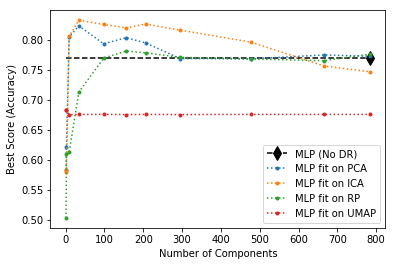

In [4]:
fig, ax = plt.subplots()

x_variable = "param_pca__n_components"
z_variable = "mean_test_score"
best_scores = get_max_along_df_axis(dfs['PCA'], z_variable, x_variable)
ax.plot(784, dfs['No DR'].loc[:, z_variable].max(), 'd--k', markersize=10, label='MLP (No DR)')
c = ax.get_lines()[-1].get_color()
ax.plot((0, 784), (dfs['No DR'].loc[:, z_variable].max(), dfs['No DR'].loc[:, z_variable].max()), '--', color=c)


x_variable = "param_pca__n_components"
z_variable = "mean_test_score"
best_scores = get_max_along_df_axis(dfs['PCA'], z_variable, x_variable)
ax.plot(best_scores[:, 0], best_scores[:, 1], '.:', label='MLP fit on PCA')

x_variable = "param_ica__n_components"
z_variable = "mean_test_score"
best_scores = get_max_along_df_axis(dfs['ICA'], z_variable, x_variable)
ax.plot(best_scores[:, 0], best_scores[:, 1], '.:', label='MLP fit on ICA')

x_variable = "param_rp__n_components"
z_variable = "mean_test_score"
best_scores = get_max_along_df_axis(dfs['RP'], z_variable, x_variable)
ax.plot(best_scores[:, 0], best_scores[:, 1], '.:', label='MLP fit on RP')

x_variable = "param_umap__n_components"
z_variable = "mean_test_score"
best_scores = get_max_along_df_axis(dfs['UMAP'], z_variable, x_variable)
ax.plot(best_scores[:, 0], best_scores[:, 1], '.:', label='MLP fit on UMAP')

ax.legend()
ax.set_xlabel("Number of Components")
ax.set_ylabel("Best Score (Accuracy)")

fig.savefig(f"{casename}_nn_summary.png")
plt.show()

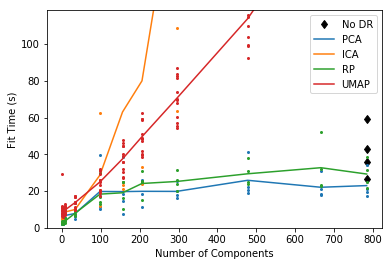

In [57]:
fig, ax = plt.subplots()

lines = []
lines.append(ax.plot([784] * len(dfs['No DR'].mean_fit_time), dfs['No DR'].mean_fit_time, 'd', label='No DR', color='k')[0])
for name in dfs:
    if name == 'No DR':
        continue
    label = name
    n_comp_name = f'param_{label.lower()}__n_components'
    grouped = dfs[label].groupby(n_comp_name)
    lines.append(ax.plot(grouped.mean().index, grouped.mean().mean_fit_time, label=label)[0])
    c = ax.get_lines()[-1].get_color()
    for name, group in grouped:
        ax.plot(group.loc[:, n_comp_name], group.loc[:, 'mean_fit_time'], '.', c=c, ms=4)

ax.set_ylim((0, dfs['No DR'].mean_fit_time.max()*2))
ax.legend(handles=lines)
ax.set_xlabel('Number of Components')
ax.set_ylabel('Fit Time (s)')
fig.savefig(f'{casename}_fit_time.png')

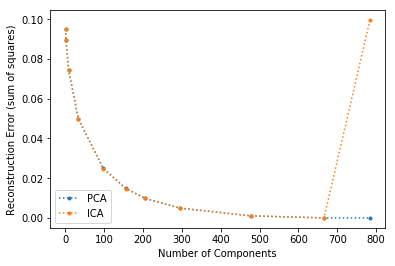

In [58]:
casename = 'quickdraw'
reconstruction_errors = {
    'PCA': joblib.load(f'{casename}_pca_reconstruction_error.pkl'),
    'ICA': joblib.load(f'{casename}_ica_reconstruction_error.pkl'),
}

fig, ax = plt.subplots()

for name, data in reconstruction_errors.items():
    ax.plot(data[:, 0], data[:, 1], '.:', label=name)

ax.legend()
ax.set_xlabel("Number of Components")
ax.set_ylabel("Reconstruction Error (sum of squares)")
fig.savefig(f'{casename}_reconstruction_error.png')

In [61]:
# df_umap = pd.DataFrame.from_csv(quickdraw_)
casename = 'synthetic'
dfs_synthetic = {
    'No DR': pd.read_csv(f'{casename}_nn_all_features_results.csv'),
    'PCA': pd.read_csv(f'{casename}_pca_results.csv'),
    'ICA': pd.read_csv(f'{casename}_ica_results.csv'),
    'RP': pd.read_csv(f'{casename}_rp_results_0.csv'),
    'UMAP': pd.read_csv(f'{casename}_umap_results.csv'),
}

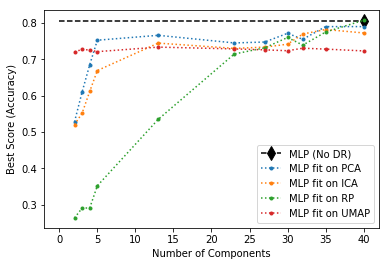

In [63]:
fig, ax = plt.subplots()

x_variable = "param_pca__n_components"
z_variable = "mean_test_score"
best_scores = get_max_along_df_axis(dfs_synthetic['PCA'], z_variable, x_variable)
ax.plot(40, dfs_synthetic['No DR'].loc[:, z_variable].max(), 'd--k', markersize=10, label='MLP (No DR)')
c = ax.get_lines()[-1].get_color()
ax.plot((0, 40), (dfs_synthetic['No DR'].loc[:, z_variable].max(), dfs_synthetic['No DR'].loc[:, z_variable].max()), '--', markersize=10, color=c)


x_variable = "param_pca__n_components"
z_variable = "mean_test_score"
best_scores = get_max_along_df_axis(dfs_synthetic['PCA'], z_variable, x_variable)
ax.plot(best_scores[:, 0], best_scores[:, 1], '.:', label='MLP fit on PCA')

x_variable = "param_ica__n_components"
z_variable = "mean_test_score"
best_scores = get_max_along_df_axis(dfs_synthetic['ICA'], z_variable, x_variable)
ax.plot(best_scores[:, 0], best_scores[:, 1], '.:', label='MLP fit on ICA')

x_variable = "param_rp__n_components"
z_variable = "mean_test_score"
best_scores = get_max_along_df_axis(dfs_synthetic['RP'], z_variable, x_variable)
ax.plot(best_scores[:, 0], best_scores[:, 1], '.:', label='MLP fit on RP')

x_variable = "param_umap__n_components"
z_variable = "mean_test_score"
best_scores = get_max_along_df_axis(dfs_synthetic['UMAP'], z_variable, x_variable)
ax.plot(best_scores[:, 0], best_scores[:, 1], '.:', label='MLP fit on UMAP')

ax.legend()
ax.set_xlabel("Number of Components")
ax.set_ylabel("Best Score (Accuracy)")

fig.savefig(f"{casename}_nn_summary.png")
plt.show()

In [57]:
casename = 'synthetic'
reconstruction_errors = {
    'PCA': joblib.load(f'{casename}_pca_reconstruction_error.pkl'),
    'ICA': joblib.load(f'{casename}_ica_reconstruction_error.pkl'),
}

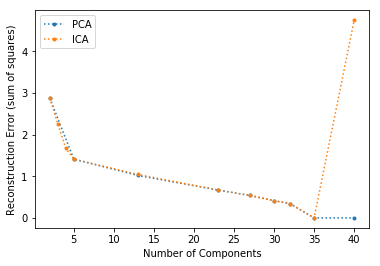

In [59]:
fig, ax = plt.subplots()

for name, data in reconstruction_errors.items():
    ax.plot(data[:, 0], data[:, 1], '.:', label=name)

ax.legend()
ax.set_xlabel("Number of Components")
ax.set_ylabel("Reconstruction Error (sum of squares)")
fig.savefig(f'{casename}_reconstruction_error.png')

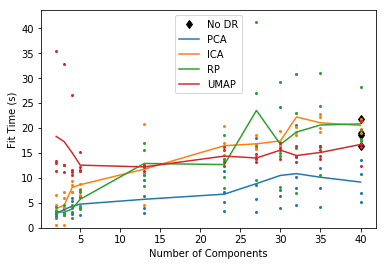

In [63]:
fig, ax = plt.subplots()

lines = []
lines.append(ax.plot([40] * len(dfs_synthetic['No DR'].mean_fit_time), dfs_synthetic['No DR'].mean_fit_time, 'd', label='No DR', color='k')[0])
for name in dfs:
    if name == 'No DR':
        continue
    label = name
    n_comp_name = f'param_{label.lower()}__n_components'
    grouped = dfs_synthetic[label].groupby(n_comp_name)
    lines.append(ax.plot(grouped.mean().index, grouped.mean().mean_fit_time, label=label)[0])
    c = ax.get_lines()[-1].get_color()
    for name, group in grouped:
        ax.plot(group.loc[:, n_comp_name], group.loc[:, 'mean_fit_time'], '.', c=c, ms=4)

ax.set_ylim((0, dfs_synthetic['No DR'].mean_fit_time.max()*2))
ax.legend(handles=lines)
ax.set_xlabel('Number of Components')
ax.set_ylabel('Fit Time (s)')
fig.savefig(f'{casename}_fit_time.png')